---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---

# Detecção de Fraudes em Cartões de Crédito

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

<img src="http://sigmoidal.ai/wp-content/uploads/2019/12/900.jpg" width="60%">

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

<img src="http://sigmoidal.ai/wp-content/uploads/2019/12/54.jpg" width="50%">

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

In [73]:
# importar os pacotes necessários
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier

sns.set_style('dark')

from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

Para facilitar a aquisição dos dados, existe um *link* com acesso direto ao `csv`. Com isso, basta importar o conjunto de dados usando o método `pd.read_csv()`.

In [3]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv(file_path)

Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

## Análise Exploratória


Apenas olhando as cinco primeiras entradas é possível tirar algumas conclusões:

* As 5 primeiras entradas permitem entender como a transformação PCA deixou as *features* descaracterizadas (anônimas) e em valores numéricos. Para saber mais sobre PCA, [clique neste *link*](http://www2.ic.uff.br/~aconci/PCA-ACP.pdf).

* As colunas `Time` e `Amount` foram preservadas, mantendo seu valor original.

* A variável alvo está representada na coluna `Class`, onde:
    * **0:** Transação normal; e
    * **1:** Transação fraudulenta;

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Como primeira análise, vamos descobrir se nosso *dataset* possui valores nulos. Se sim quantos são e como iremos trata-los. 

In [56]:
df.isnull().sum().max() #verifica quantidade de valores nulos no dataset

0

O método describe nos permite saber algumas métricas importantes do nosso *dataset*. Podemos perceber, analisando a média e o desvio padrão, que as váriáveis que passaram pelo *PCA* não possuem nenhum valor discrepante bem como a coluna *time*.


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Quanto à coluna *Amount* podemos verificar que o valor médio das transações é 88.34 com um desvio padrão de 250.12 e valor máximo 25691.  Ainda é possivel perceber que 75% dos valores estão abaixo de 77.16 (considerando fraude e transações normais). Para termos um panorama melhor sobre os valores em relação a cada classe vamos plotar dois gráficos de caixa.

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64 

 count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


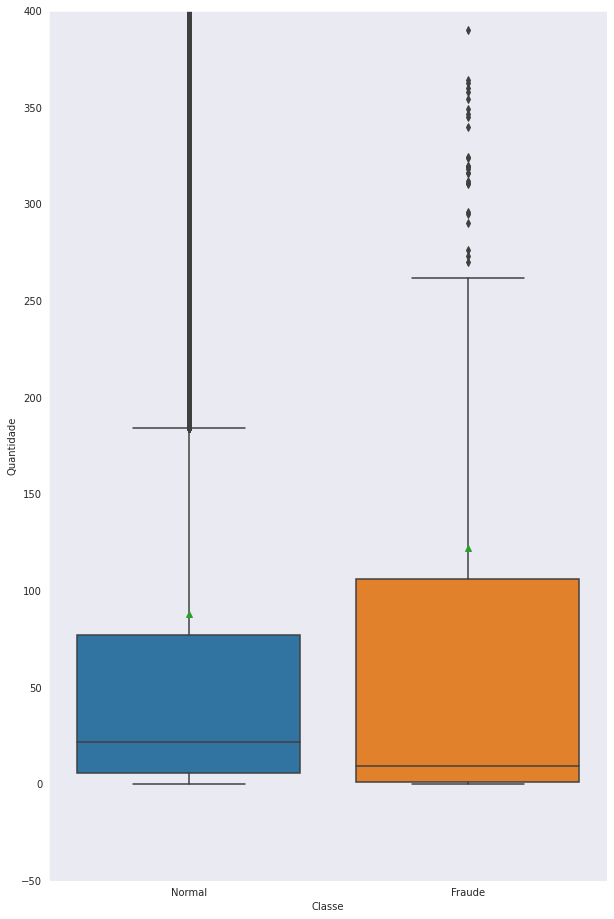

In [54]:
#Mostrar resumo descritivo para cada classe e plotar grafico de caixa correpondente. 
fig,ax = plt.subplots(figsize=(10,16))
sns.boxplot(df.Class, df.Amount,showmeans=True,ax=ax,)
ax.set_ylim(-50,400)
ax.set_xticklabels(['Normal','Fraude'])
ax.set_xlabel('Classe')
ax.set_ylabel('Quantidade')
fig.show()
print(df[df['Class']==0].Amount.describe(),'\n\n',df[df['Class']==1].Amount.describe())

Com essas análises sobre a quantidade, percebemos que o maior número de transações ocorreu para valores baixos. Cerca de até 77.05 para transações normais e até 105.89 para fraudes.

Fazendo uma análise já pensando em nosso modelo de Machine Learning, é importante verificar se nossos dados estão balanceados, ou seja, se existe um número próximo de observações para transações classificadas como normais e fraudes.

Vamos ver a proporção de cada classe. 

In [61]:
df.Class.value_counts()/df.shape[0]

0    0.998273
1    0.001727
Name: Class, dtype: float64

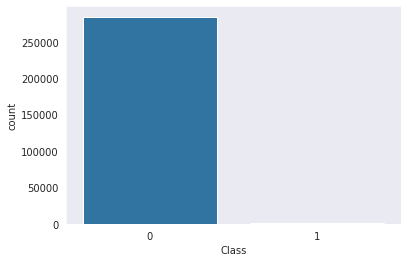

In [58]:
sns.countplot(df.Class);

Podemos ver na análise acima que nossos dados estão muito desbalancados. Isso enviésa nossa análise fazendo com que nosso modelo classifique muito bem transações normais mas que não seja bom em classificar transações fraudulentas. 

No próximo passo vamos tratar esse desbalanceamento.

## Preparação dos Dados

Vamos normalizar os dados que ainda não haviam sido pré-processados (`Time` e `Amount`)


In [64]:
df_clean = df.copy()

#padronizar colunas amout e time
scaler = StandardScaler()
df_clean['std_amout'] = scaler.fit_transform(df_clean['Amount'].values.reshape(-1,1))
df_clean['std_time'] = scaler.fit_transform(df_clean['Time'].values.reshape(-1,1))

df_clean.drop(['Time','Amount'],axis=1, inplace=True)

Vamos dividir o conjunto de dados entre treino e teste e balancear os nossos dados.


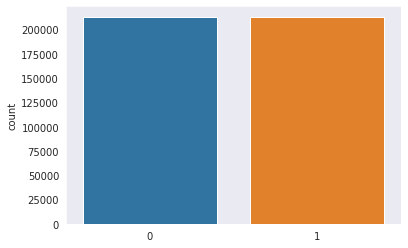

In [75]:
#Separar entre feature matrix e target vector
X = df_clean.drop('Class',axis=1)
y = df_clean['Class']

#separa os dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)


#balancear os dados
sm = SMOTE(random_state=1)
X_sm, y_sm = sm.fit_sample(X_train,y_train)

sns.countplot(y_sm); # Plotar dados balanceados

Para saber mais sobre dados desbalanceados, acesse esse [link](https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18).

## Modelo de Machine Learning

Utilizaremos os modelos de [Regressão Logística](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc)  e [Ávore de Decisão](https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052) para fazer nossa classificação e comparação.

In [88]:
#instanciar o modelo
model_rl = LogisticRegression()
model_ad = DecisionTreeClassifier(criterion='entropy', max_depth=8)

#fit do modelo
model_rl.fit(X_sm,y_sm)
model_ad.fit(X_sm,y_sm)
#predict do modelo
y_pred_rl = model_rl.predict(X_test)
y_pred_ad = model_ad.predict(X_test)

## Avaliar o desempenho do modelo

Para datasets inicialmente desbalanceados, a somente a acurácia não é uma boa métrica, podemos então considerar o recall e a precisão. 

Vamos ver as mérticas de desempenho do modelo de Regressão Logística.

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71091
           1       0.07      0.87      0.12       111

    accuracy                           0.98     71202
   macro avg       0.53      0.93      0.56     71202
weighted avg       1.00      0.98      0.99     71202



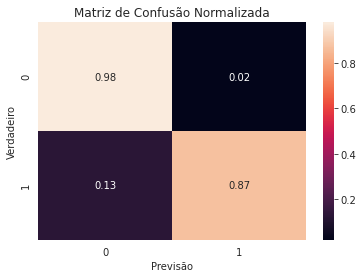

In [86]:
fig,ax = plt.subplots()
print(classification_report(y_test,y_pred_rl))
sns.heatmap(confusion_matrix(y_test,y_pred_rl,normalize='true'), annot=True,ax=ax)
ax.set_title('Matriz de Confusão Normalizada')
ax.set_xlabel('Previsão')
ax.set_ylabel('Verdadeiro')
fig.show()

Vamos ver as mérticas de desempenho do modelo Árvore de Decisão.

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     71091
           1       0.09      0.83      0.16       111

    accuracy                           0.99     71202
   macro avg       0.54      0.91      0.58     71202
weighted avg       1.00      0.99      0.99     71202



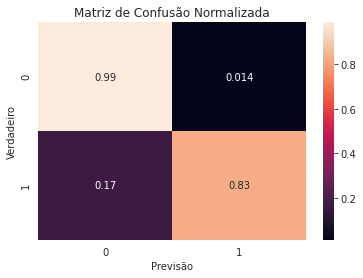

In [89]:
fig,ax = plt.subplots()
print(classification_report(y_test,y_pred_ad))
sns.heatmap(confusion_matrix(y_test,y_pred_ad,normalize='true'), annot=True,ax=ax)
ax.set_title('Matriz de Confusão Normalizada')
ax.set_xlabel('Previsão')
ax.set_ylabel('Verdadeiro')
fig.show()

Analisando os dois modelos percebemos que o modelo árvore de decisão teve uma maior proporção de falsos negativos. Logo, a regressão logística teve um desempenho melhor em classificar corretamente transações fraudulentas.



## Conclusão

Como você pode observar, não se trata de um problema trivial. Apesar dos dados estarem bem tratados e limpos, sem valores ausentes ou variáveis categóricas, o desbalanceamento e a Transformação PCA demandaram um trabalho considerável.

Obviamente, apesar do bom resultado final, há espaço para testar o desempenho com outros algoritmos de classificação, além de otimizar seus parâmetros.